download data and unzip
`kaggle competitions download -c titanic`

In [18]:
import pandas as pd
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics

In [3]:
train_data = pd.read_csv("./dataset/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("./dataset/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
train_data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,257.353842,0.486592,0.836071,257.353842,0.477990,14.526497,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,20.125000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,38.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


In [53]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [56]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

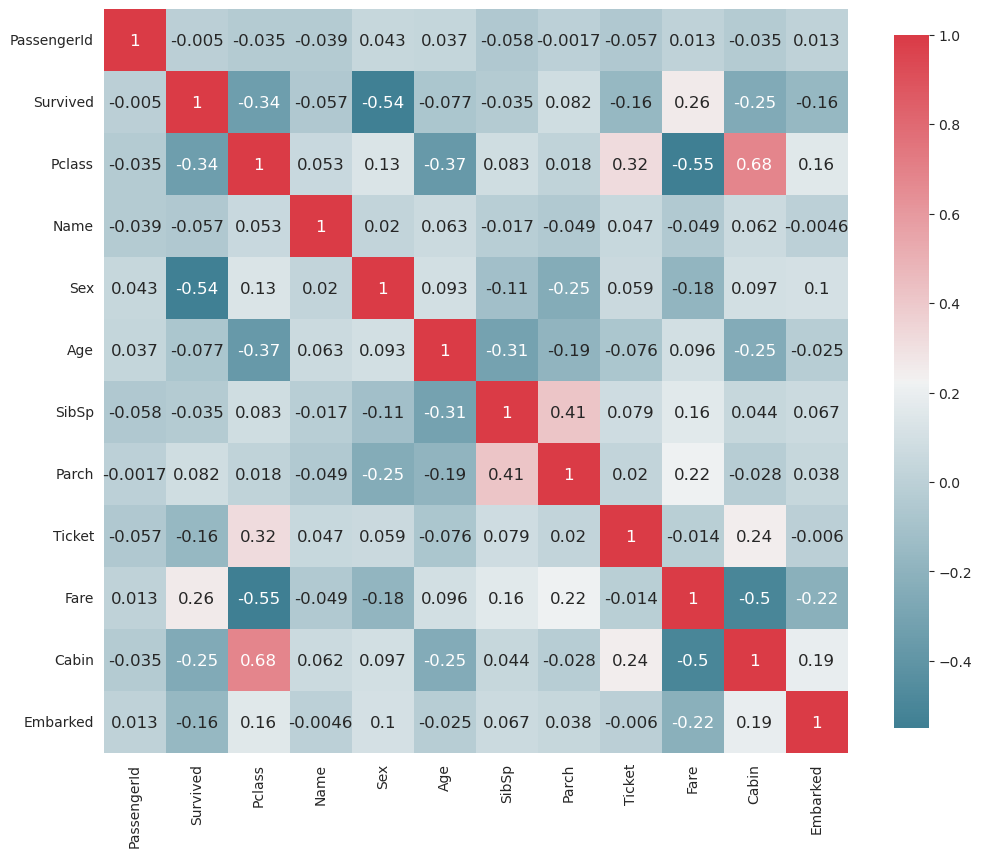

In [57]:
plot_correlation_map(train_data)

In [6]:
# 看标签列分布情况
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

根据分布情况，决定使用什么样的cross-validation， k-fold k取多大。使用什么metric来当衡量指标。
数据量并不多，分布没有非常的偏斜。
kfold? AUC?

In [10]:
# 看每一列分布情况
def first_look_data(train_data):
    for col in train_data.columns:
        print(f"Number of distinct elements for column '{col}': {train_data[col].nunique()}")
        print(f"Distinct values and their count for column '{col}':")
        print(train_data[col].value_counts())
        print("==="*20)

first_look_data(train_data)

Number of distinct elements for column 'PassengerId': 891
Distinct values and their count for column 'PassengerId':
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
Number of distinct elements for column 'Survived': 2
Distinct values and their count for column 'Survived':
0    549
1    342
Name: Survived, dtype: int64
Number of distinct elements for column 'Pclass': 3
Distinct values and their count for column 'Pclass':
3    491
1    216
2    184
Name: Pclass, dtype: int64
Number of distinct elements for column 'Name': 891
Distinct values and their count for column 'Name':
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McC

In [13]:
from sklearn import model_selection 

train_data['kfold'] = -1
train_data.sample(frac=1).reset_index(drop=True) # frac = 1是sample作用在哪个轴上，reset_index是需要把sample后的df重新换新的index https://stackoverflow.com/questions/71758460/effect-of-pandas-dataframe-sample-with-frac-set-to-1
# fetch labels
y = train_data.Survived.values
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X=train_data, y=y)): # 填充新的 kfold 列
    train_data.loc[val_, 'kfold'] = fold 

train_data.to_csv("./dataset/train_folds.csv", index=False) # 保存划分好的数据集

In [14]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,kfold
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,4


做完k-fold以及选择完metric，下一步做feature engineering

先处理NA值

1. 对类别值，第一种做法：mapping到数值上，labelEncoding =>适用于树形模型
2. 对类别值，第二种做法：直接用onehot 都能用，比上面的能多用于线性模型 liner regression and SVM， 对于多维的可以用 SVD降维
3. 还有种做法：用embedding。

对于在训练集中出现很少，或者几乎不出现的，但是测试集中却有很多的类别，需要特殊考虑。例如将测试集加到一起做label encoding or onehot， 或者新加一类unknown。等等

特征选择
以及特种组合

k-fold 的作用是用来选择好的模型，确保模型在各种情况都有很好的泛化能力。比如直接按80%/20%划分，万一很难预测的都在20%里，就无法衡量模型的能力。

最终是将选择好的模型，用所有的数据去train，然后用来预测。
https://stats.stackexchange.com/questions/52274/how-to-choose-a-predictive-model-after-k-fold-cross-validation
https://scikit-learn.org/stable/modules/cross_validation.html

## 问题： 如何选择K？


In [48]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from scipy import sparse
from sklearn import decomposition
import xgboost as xgb

def run(fold):
    train_data = pd.read_csv("./dataset/train_folds.csv")
    num_cols = [
        "Pclass",
        "Age",
        "SibSp",
        "Parch",
        "Fare"
    ]

    features = [
        f for f in train_data.columns if f not in ("kfold", "Survived", "PassengerId")
    ]

    for col in features:
        # do not encode the numerical columns
        if col not in num_cols:
            train_data[col] = train_data[col].astype(str).fillna("NONE")

    # initialize LabelEncoder for each feature column
    lbl = preprocessing.LabelEncoder()

    # now its time to label encode the features
    for col in features:
        if col not in num_cols:

            # fit label encoder on all data
            lbl.fit(train_data[col])
            # transform all the data
            train_data[col] = lbl.transform(train_data[col])

    # get training data using folds
    df_train = train_data[train_data.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = train_data[train_data.kfold == fold].reset_index(drop=True)

    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values

    # initialize Logistic Regression model
    model = xgb.XGBClassifier(n_jobs=-1, max_depth=20, n_estimators=200)
    # fit model on training data (ohe)
    model.fit(x_train, df_train.Survived.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.Survived.values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")

In [49]:
for i in range(0, 5):
    run(i)

Fold = 0, AUC = 0.8662714097496707
Fold = 1, AUC = 0.8518716577540107
Fold = 2, AUC = 0.903475935828877
Fold = 3, AUC = 0.8693850267379679
Fold = 4, AUC = 0.8677037627975003


In [38]:
def run_all_data():
    train_data = pd.read_csv("./dataset/train.csv")
    test_data = pd.read_csv("./dataset/test.csv")
    num_cols = [
        "Pclass",
        "Age",
        "SibSp",
        "Parch",
        "Fare"
    ]

    features = [
        f for f in train_data.columns if f not in ("Survived", "PassengerId")
    ]

    for col in features:
        # do not encode the numerical columns
        if col not in num_cols:
            train_data[col] = train_data[col].astype(str).fillna("NONE")

    # initialize LabelEncoder for each feature column
    lbl = preprocessing.LabelEncoder()

    # now its time to label encode the features
    for col in features:
        if col not in num_cols:

            # fit label encoder on all data
            lbl.fit(train_data[col])
            # transform all the data
            train_data[col] = lbl.transform(train_data[col])

    # get training data using folds
    df_train = train_data.reset_index(drop=True)
    # get validation data using folds
    df_valid = test_data

    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values

    # initialize Logistic Regression model
    model = xgb.XGBClassifier(n_jobs=-1, max_depth=7, n_estimators=200)
    # fit model on training data (ohe)
    model.fit(x_train, df_train.Survived.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)
    # get roc auc score
    valid_preds.to_csv("./dataset/predict.csv")


In [43]:
train_data = pd.read_csv("./dataset/train.csv")
test_data = pd.read_csv("./dataset/test.csv")
num_cols = [
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Fare"
]

features = [
    f for f in train_data.columns if f not in ("Survived", "PassengerId")
]

for col in features:
    # do not encode the numerical columns
    if col not in num_cols:
        train_data[col] = train_data[col].astype(str).fillna("NONE")
        test_data[col] = test_data[col].astype(str).fillna("NONE")

# initialize LabelEncoder for each feature column
lbl = preprocessing.LabelEncoder()

# now its time to label encode the features
for col in features:
    if col not in num_cols:

        # fit label encoder on all data
        lbl.fit(train_data[col])
        # transform all the data
        train_data[col] = lbl.transform(train_data[col])

# initialize LabelEncoder for each feature column
lbl_test = preprocessing.LabelEncoder()

# now its time to label encode the features
for col in features:
    if col not in num_cols:

        # fit label encoder on all data
        lbl_test.fit(test_data[col])
        # transform all the data
        test_data[col] = lbl_test.transform(test_data[col])


# get training data using folds
df_train = train_data.reset_index(drop=True)
# get validation data using folds
df_valid = test_data

# get training data
x_train = df_train[features].values
# get validation data
x_valid = df_valid[features].values

# initialize Logistic Regression model
model = xgb.XGBClassifier(n_jobs=-1, max_depth=7, n_estimators=200)
# fit model on training data (ohe)
model.fit(x_train, df_train.Survived.values)
# predict on validation data
# we need the probability values as we are calculating AUC
# we will use the probability of 1s
valid_preds = model.predict(x_valid)


In [47]:
predict = pd.read_csv("./dataset/test.csv")
predict.loc[:, 'Survived'] = valid_preds
predict[["PassengerId", "Survived"]].to_csv("./dataset/predict.csv", index=False)